<a href="https://colab.research.google.com/github/rishuptdr/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/R_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
# importing the library

import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
#some more 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from scipy.interpolate import interp1d

from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


%matplotlib inline

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline


In [170]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm


##Import relevent data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path= "/content/drive/MyDrive/ml 3/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df= pd.read_csv(file_path)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

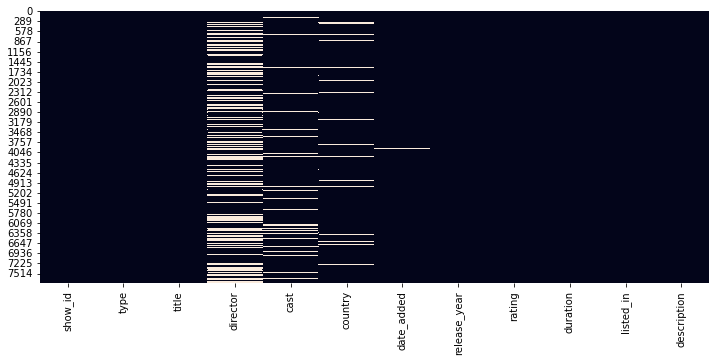

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
df["country"].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [ ]:
cas_df = df[df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [ ]:
cas_df

title
3%                                 João Miguel
3%                            Bianca Comparato
3%                                Michel Gomes
3%                             Rodolfo Valente
3%                             Vaneza Oliveira
                                 ...          
Zubaan                          Anita Shabdish
Zubaan                   Chittaranjan Tripathy
Zulu Man in Japan                      Nasty C
Zumbo's Just Desserts            Adriano Zumbo
Zumbo's Just Desserts              Rachel Khoo
Length: 55955, dtype: object

In [ ]:
cld_df = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [ ]:
cld_df

title
7:19                                       Jorge Michel Grau
23:59                                           Gilbert Chan
9                                                Shane Acker
21                                            Robert Luketic
46                                               Serdar Akar
                                                 ...        
Zoo                                             Shlok Sharma
Zoom                                            Peter Hewitt
Zozo                                             Josef Fares
Zubaan                                           Mozez Singh
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS             Sam Dunn
Length: 6115, dtype: object

In [ ]:
df['director'].fillna(df['director'].mode()[0], inplace=True)

In [ ]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])

In [ ]:
df = df[df['date_added'].notna()]

Fixxing null value in country column 

In [ ]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

#Exploratory Data Analysis

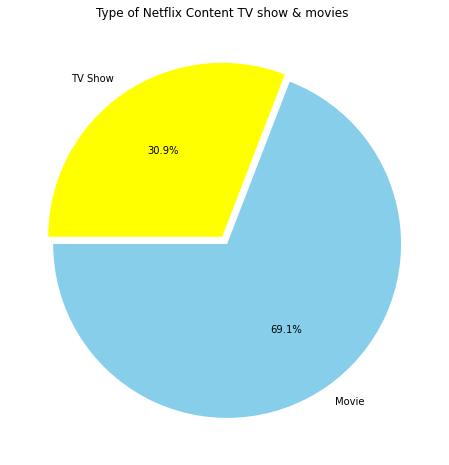

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Type of Netflix Content TV show & movies ")
g = plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels=df.type.value_counts().index, colors=['skyblue','yellow'],autopct='%1.1f%%', startangle=180)
plt.show()

It is evident that there are more movies on Netflix than TV shows.

Netflix has 5377 movies, which is more than double the quantity of TV shows.

There are about 70% movies and 30% TV shows on Netflix

Nearly 2/3rd of the content on netflix are movies while the rest are TV Show

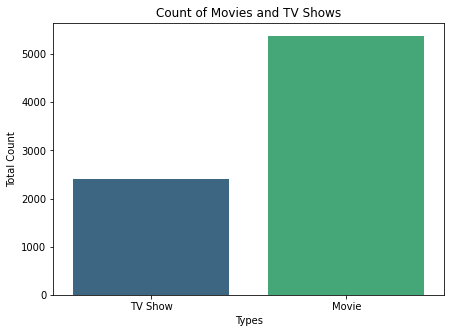

In [ ]:
plt.figure(figsize=(7,5))
g = sns.countplot(df.type, palette="viridis");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Types")
plt.ylabel("Total Count")
plt.show()

In [ ]:
df_shows = df[df["type"]=="TV Show"]
df_movies = df[df["type"]=="Movie"]


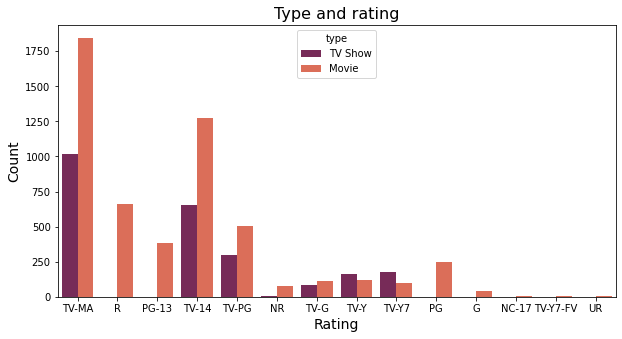

In [ ]:
#Rating wise analysis
plt.figure(figsize=(10,5))
sns.countplot(x='rating',hue='type',data=df,palette="rocket")
plt.title('Type and rating',fontsize = 16)
plt.xlabel('Rating', fontsize = 14) 
plt.ylabel('Count', fontsize = 14)  
plt.show()

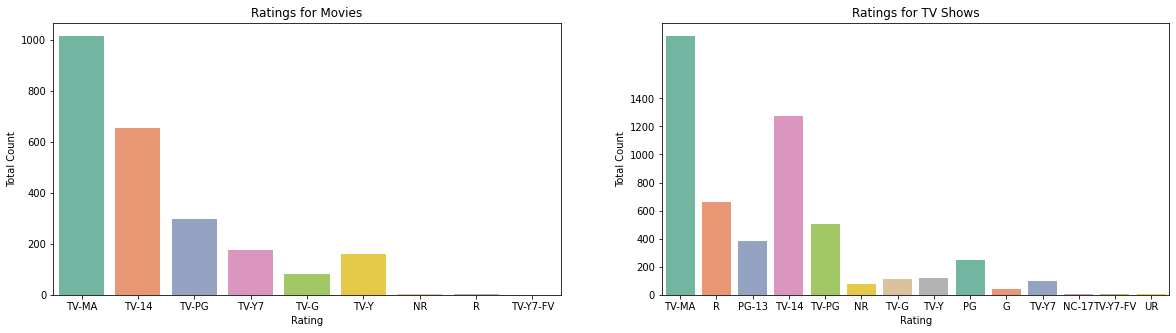

In [ ]:
#for TV show and movies individually
fig, ax = plt.subplots(1,2, figsize=(20, 5))
g1 = sns.countplot(df_shows.rating,palette="Set2", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(df_movies.rating,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

In [ ]:
#Counting number of movies and TV shows with respect to year

year_df = df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"}).sort_values(by=['year'])
movies_year_df = df_movies.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"}).sort_values(by=['year'])
shows_year_df = df_shows.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"}).sort_values(by=['year'])
year_df.sort_values(by=['year'])

,year,count
11,2008,2
12,2009,2
13,2010,1
8,2011,13
10,2012,3
9,2013,11
7,2014,25
6,2015,88
4,2016,443
3,2017,1225


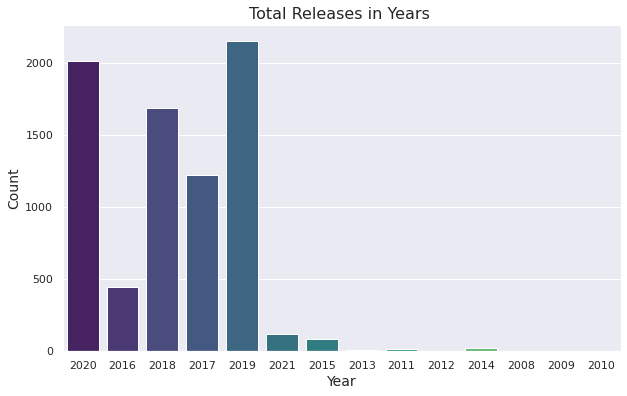

In [ ]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x='year_added',data=df,palette = "viridis")

plt.title('Total Releases in Years ',fontsize = 16)  
plt.xlabel('Year', fontsize = 14) 
plt.ylabel('Count', fontsize = 14)   
plt.show()

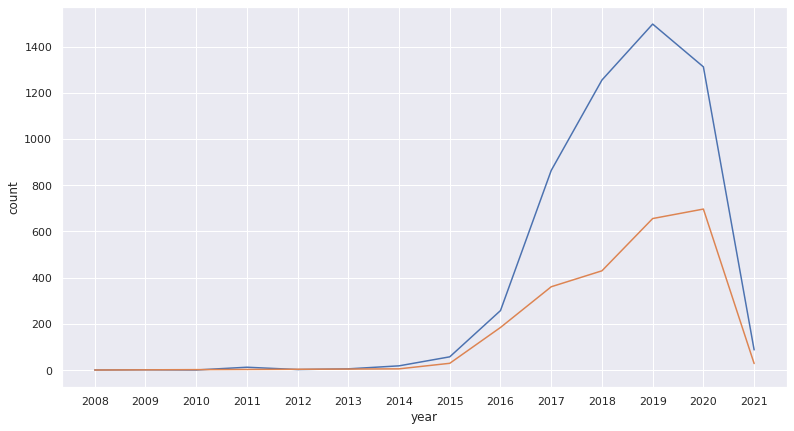

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=movies_year_df,x='year',y='count')
sns.lineplot(data=shows_year_df,x='year',y='count')
plt.show()

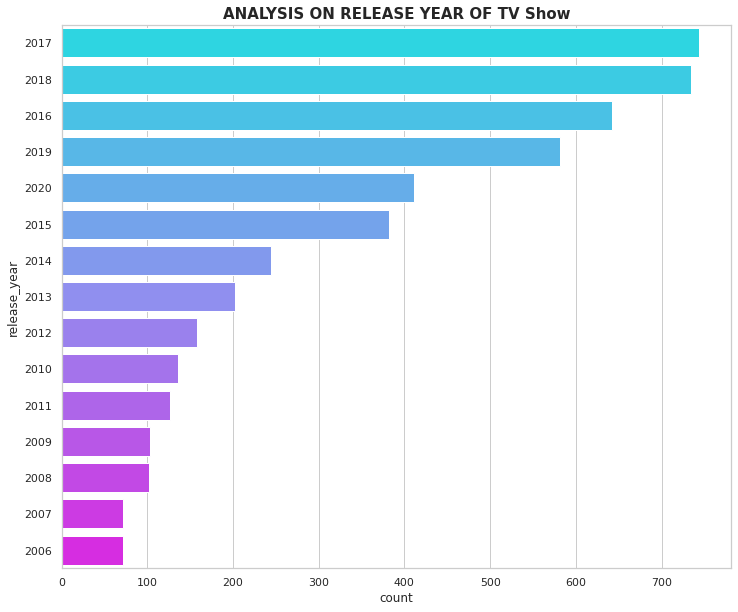

In [ ]:
#plotting release year of movies
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=df_movies, palette="cool", order=df_movies['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

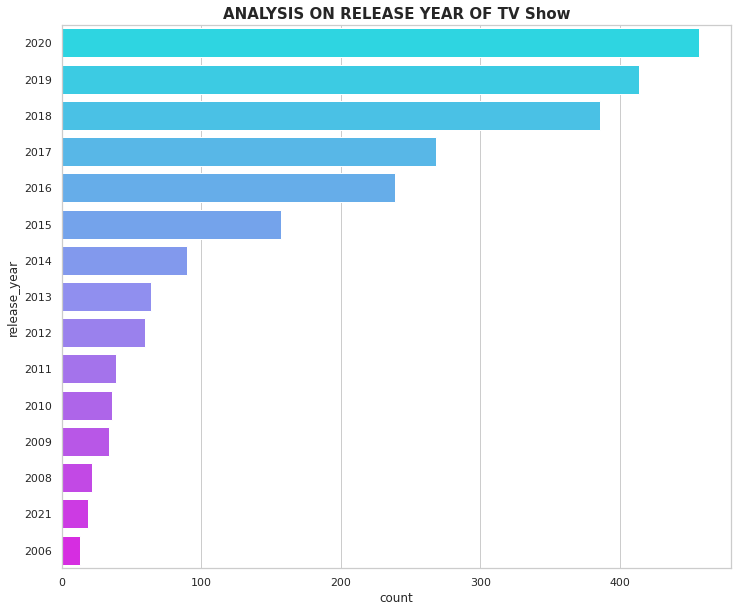

In [ ]:
#plotting release year of TV show
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=df_shows, palette="cool", order=df_shows['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

Most of the TV Shows & movies were released in 2020 followed by 2019 and 2018

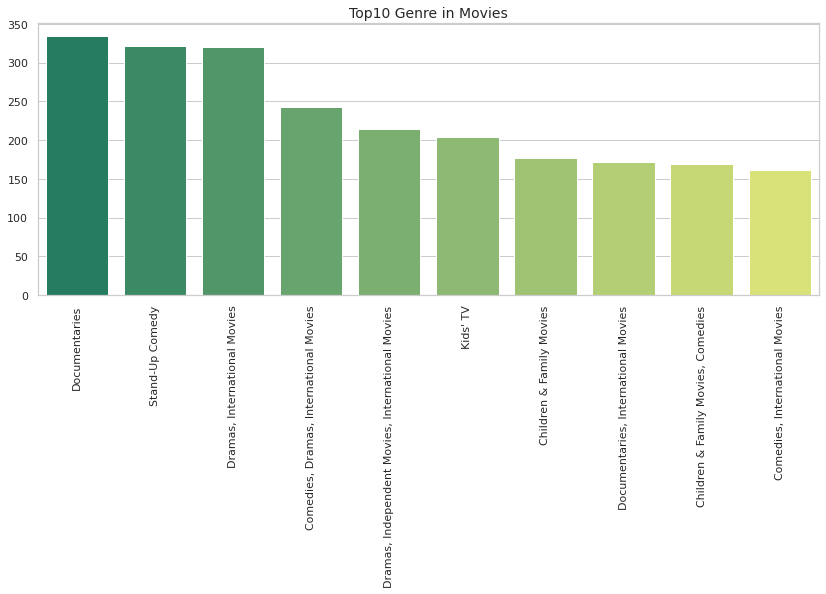

In [ ]:
# Top 10 Genre in movies
plt.figure(figsize=(14,5))
sns.barplot(x = df["listed_in"].value_counts().head(10).index,
            y = df["listed_in"].value_counts().head(10).values,palette="summer")
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",fontsize = 14)
plt.show()

In [ ]:
df['country'].value_counts()

United States                                                   3055
India                                                            923
United Kingdom                                                   396
Japan                                                            225
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

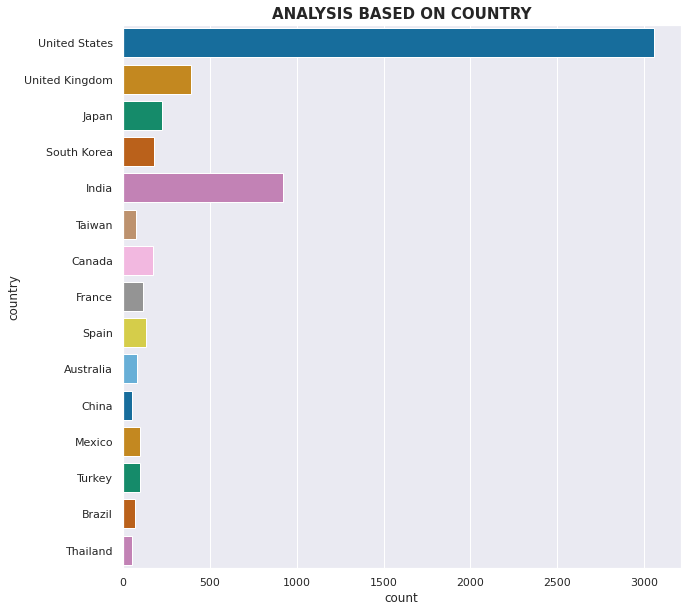

In [ ]:
#plotting release year of TV show
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="country", data=df, palette="colorblind", order=df_shows['country'].value_counts().index[0:15])

plt.title('ANALYSIS BASED ON COUNTRY', fontsize=15, fontweight='bold')
plt.show()

**Top 15 director on netflix**

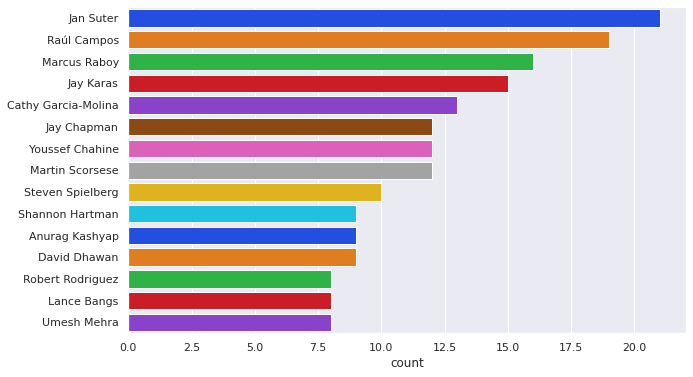

In [ ]:
sns.countplot(y = cld_df, order=cld_df.value_counts().index[:15], palette='bright')
plt.show()

**Top 15 actors on netflix**

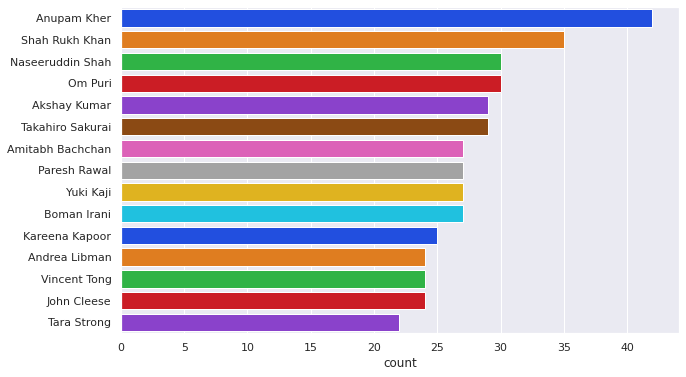

In [ ]:
sns.countplot(y = cas_df, order=cas_df.value_counts().index[:15], palette='bright')
plt.show()

**Creating a new feature month to analyse data on monthly basis**

In [ ]:
df["month"]=df['date_added'].str.split(' ').str[0]
df_month = df.groupby(["month"])['show_id'].count().reset_index(name = 'count')
df_month=df_month.drop([0])
df_month

,month,count
1,April,596
2,August,612
3,December,817
4,February,466
5,January,746
6,July,592
7,June,538
8,March,661
9,May,537
10,November,730


In [ ]:
sort_dict = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_month['month']=pd.Categorical(df_month['month'],categories=sort_dict)

df_month.sort_values(by='month',inplace=True)
df_month

,month,count
5,January,746
4,February,466
8,March,661
1,April,596
9,May,537
7,June,538
6,July,592
2,August,612
12,September,614
11,October,780


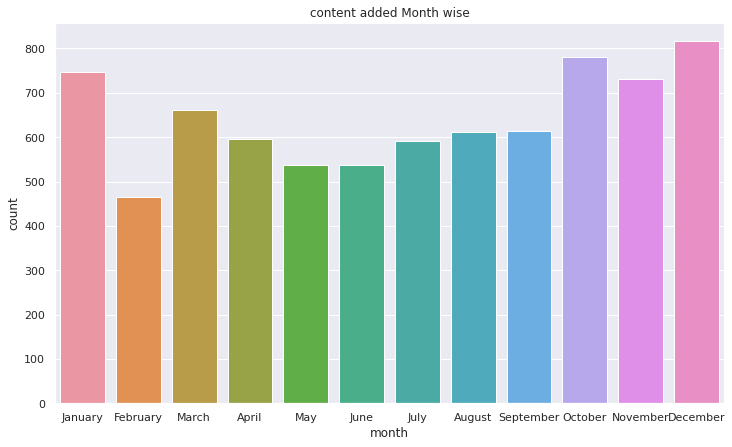

In [ ]:
#content added monthwise
plt.figure(figsize=(12,7))
plt.title('content added Month wise')
sns.barplot(x='month',y='count',data=df_month)

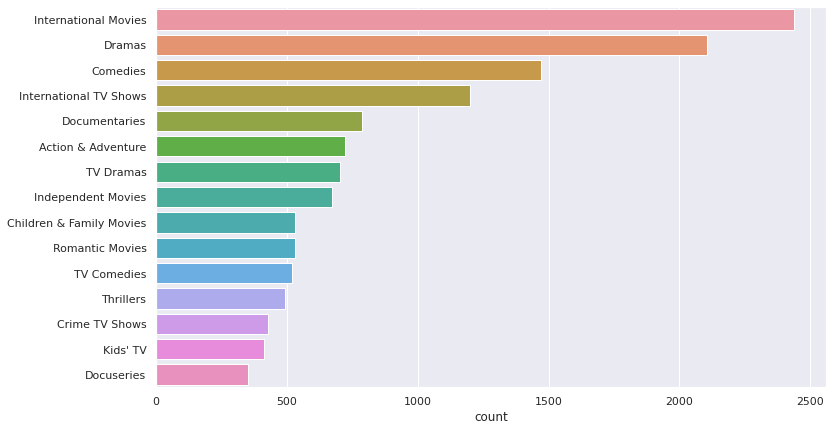

In [ ]:
#plotting content 
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,7))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:15])

###Duration

In [ ]:
df_shows['duration']=df_shows['duration'].str.replace('Season','')
df_shows['duration']=df_shows['duration'].str.replace('s','')
df_movies['duration']=df_movies["duration"].str.replace('min','')

df_movies['duration']=df_movies['duration'].astype(str).astype(int)
df_shows['duration']=df_shows['duration'].astype(str).astype(int)
#netflix['duration']

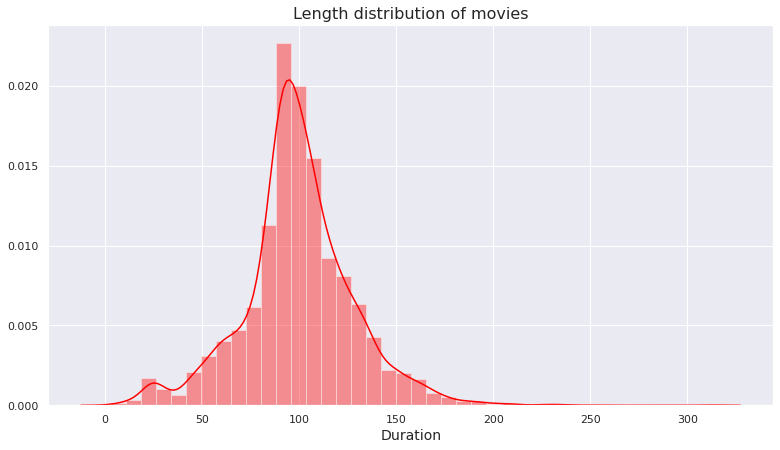

In [ ]:
plt.figure(figsize=(13,7))

sns.distplot(df_movies['duration'], bins=40,color='red').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16)
plt.xlabel('Duration', fontsize=14)
plt.show()

**Top genre added in netflix**

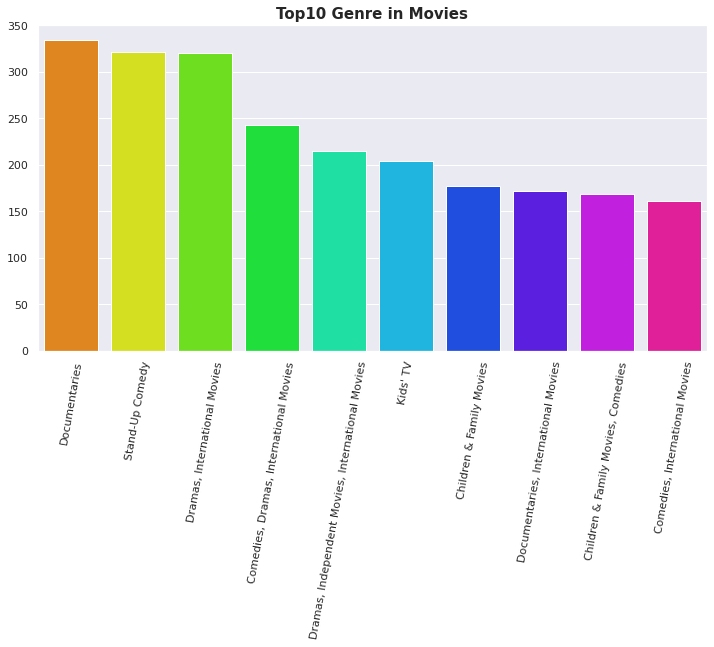

In [ ]:
# Top 10 Genre in movies
plt.figure(figsize=(12,6))
sns.barplot(x = df["listed_in"].value_counts().head(10).index,
            y = df["listed_in"].value_counts().head(10).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='15',fontweight="bold")
plt.show()

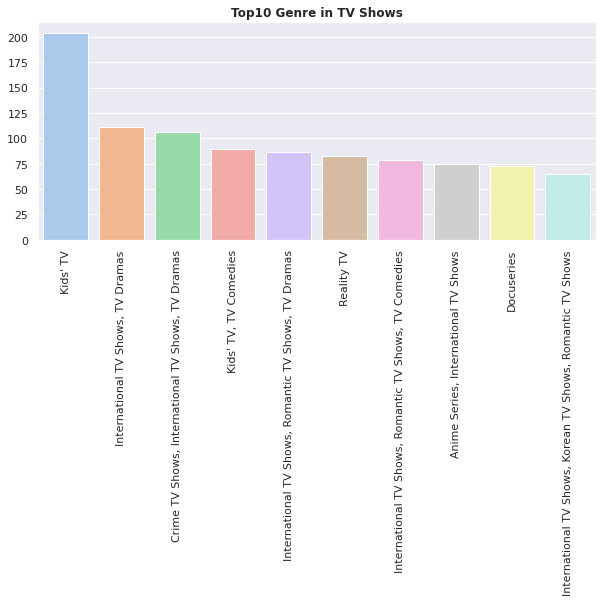

In [ ]:
#Top10 Genre in TV Shows
plt.figure(figsize=(10,4))
sns.barplot(x = df_shows["listed_in"].value_counts().head(10).index,
            y = df_shows["listed_in"].value_counts().head(10).values,palette="pastel")
plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

**Corelation Heatmap for Release year and Month**

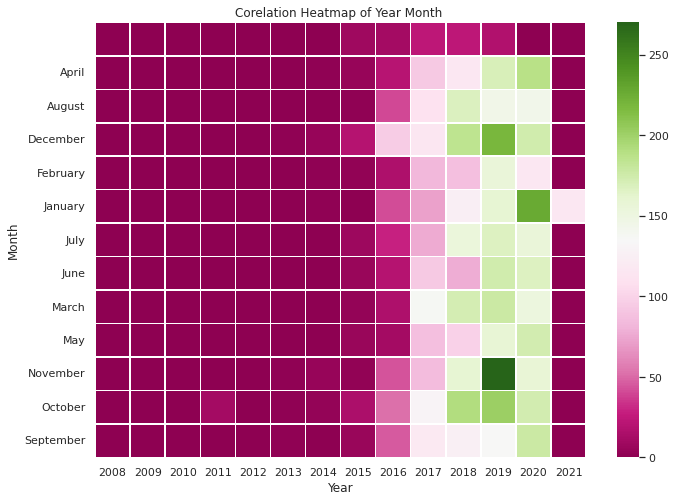

In [ ]:
#Corelation Heatmap 
month_year_df = df.groupby('year_added')['month'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=.5, cmap="PiYG")
plt.title("Corelation Heatmap of Year Month ")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In [99]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
rating,,,,,,,,,,
G,0.005650,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.009505
NC-17,0.005650,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000328
NR,0.011299,0.000000,0.000000,0.005417,0.000000,0.04,0.016393,0.007463,0.012626,0.011144
PG,0.045198,0.000000,0.008696,0.003250,0.022321,0.00,0.000000,0.007463,0.005051,0.048181
PG-13,0.016949,0.000000,0.008696,0.004334,0.013393,0.01,0.000000,0.007463,0.017677,0.075385
R,0.090395,0.000000,0.017391,0.002167,0.000000,0.04,0.000000,0.014925,0.078283,0.119961
TV-14,0.129944,0.683168,0.156522,0.563380,0.339286,0.13,0.382514,0.089552,0.171717,0.167814
TV-G,0.079096,0.000000,0.017391,0.009751,0.004464,0.02,0.005464,0.007463,0.053030,0.030810
TV-MA,0.338983,0.277228,0.652174,0.247021,0.366071,0.69,0.453552,0.813433,0.421717,0.340216


**LONGEST TV - SHOWS**

In [ ]:
#LONGEST TV - SHOWS
long_shows = df_shows[df_shows['duration']>9]
long_shows_data = long_shows[['title','duration']]
long_shows_data.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2678,Heartland,11
1577,Dad's Army,10
1597,Danger Mouse: Classic Collection,10


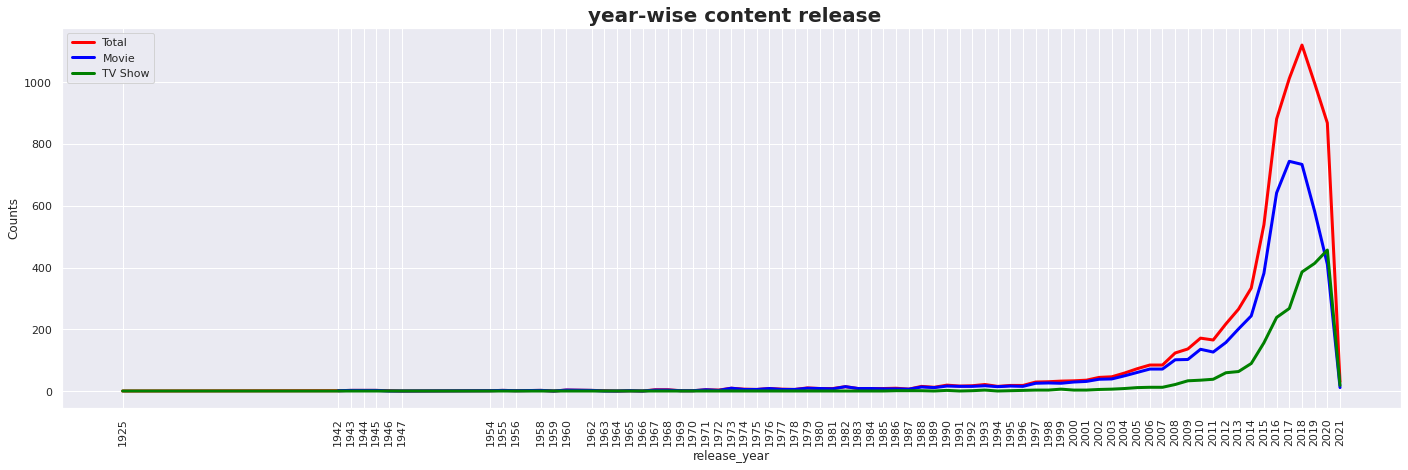

In [84]:
#Visualize the growth of netflix industry over the years

year_data = df['release_year'].value_counts().sort_index().loc[:2021]
type_data = df.groupby('release_year')['type'].value_counts().unstack().loc[:2021]


plt.figure(figsize=(24,7))

sns.lineplot(x=year_data.index,y=year_data, color = 'red', linewidth=3, label='Total')
sns.lineplot(type_data.index, type_data['Movie'], color='blue', linewidth=3, label='Movie')
sns.lineplot(type_data.index, type_data['TV Show'], color='green', linewidth=3, label='TV Show')

plt.xticks(year_data.index.unique())
plt.title(" year-wise content release", weight='bold', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Counts')
plt.legend(loc='upper left')

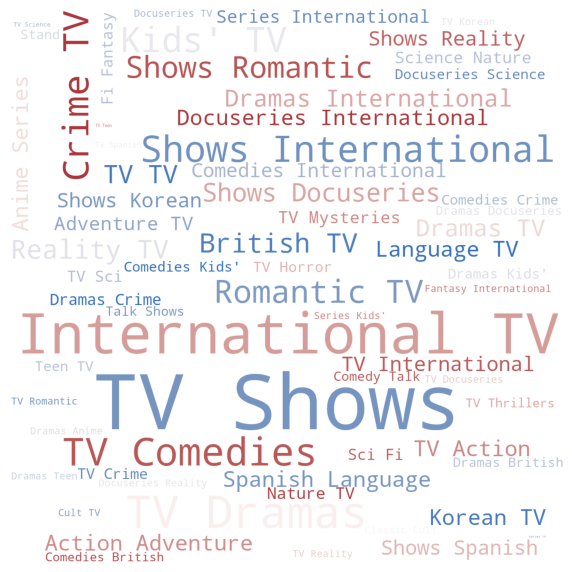

In [89]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_shows['listed_in'])

plt.rcParams['figure.figsize'] = (10,12)
wordcloud = WordCloud(background_color = 'white',colormap='vlag', width = 1200,  height = 1200, max_words = 130).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

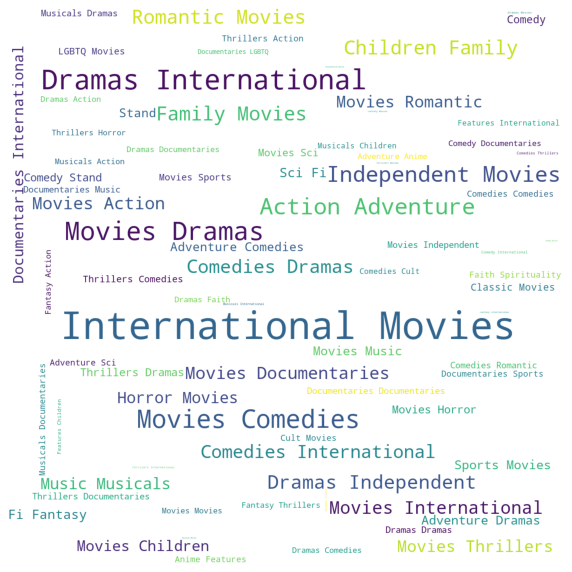

In [92]:
# the movies
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (10,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 130).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [101]:
df['description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [103]:
df2=df
import nltk
nltk.download('punkt')
#translator = str.maketrans('', '', string.punctuation)
df2['description'] = df2['description'].apply(lambda x:nltk.word_tokenize(x))
print(df2['description'])
df2['description'] =df2['description'].apply(lambda x:[word.lower() for word in x if word.isalpha()])
df2['description'] =df2['description'].apply(lambda x:" ".join(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       [In, a, future, where, the, elite, inhabit, an...
1       [After, a, devastating, earthquake, hits, Mexi...
2       [When, an, army, recruit, is, found, dead, ,, ...
3       [In, a, postapocalyptic, world, ,, rag-doll, r...
4       [A, brilliant, group, of, students, become, ca...
                              ...                        
7782    [When, Lebanon, 's, Civil, War, deprives, Zozo...
7783    [A, scrappy, but, poor, boy, worms, his, way, ...
7784    [In, this, documentary, ,, South, African, rap...
7785    [Dessert, wizard, Adriano, Zumbo, looks, for, ...
7786    [This, documentary, delves, into, the, mystiqu...
Name: description, Length: 7777, dtype: object


In [104]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [116]:

def stopwords(text):
    '''a function for removing the stopword'''
  
    text = [word.lower() for word in text.split() if word.lower() not in sw]
   
    return " ".join(text)

In [158]:
df['length_listed'] = df['listed_in'].apply(len)

In [106]:
# extracting the stopwords 
sw = stopwords.words('english')
# display the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [108]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [109]:
df['description'] = df['description'].apply(lambda x:[word.lower() for word in x.split(' ') if word.lower() not in sw])
df['description'] =df['description'].apply(lambda x:" ".join(x))

In [157]:
# count vectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit(df['description'])
dictionary = count_vectorizer.vocabulary_.items()

In [156]:
#vocab and counts
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values()

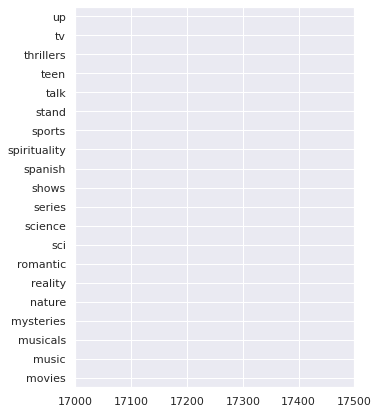

In [150]:
top_vacab = vocab_bef_stem.tail(20)
top_vacab.plot(kind = 'barh', figsize=(5,7), xlim= (17000, 17500))

In [145]:
# lists to store the vocab and counts
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)

vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

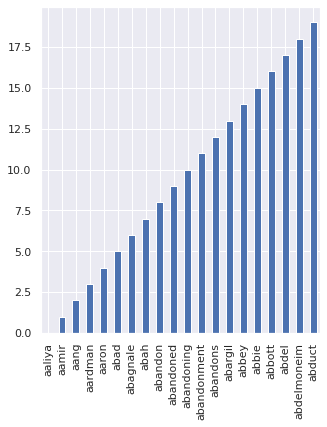

In [142]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(5,6), xlim= (19550, 19600))

In [133]:
# object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [132]:
#stemming for description
stemmer = SnowballStemmer("english")
df['description'] = df['description'].apply(lambda x:[stemmer.stem(word) for word in x.split()])
df['description'] =df['description'].apply(lambda x:" ".join(x))


In [135]:
#  vectorizer object
count_vectorizer = CountVectorizer()
count_vectorizer.fit(df['description'])
dictionary = count_vectorizer.vocabulary_.items()

In [136]:
df['length'] = df['description'].apply(len)

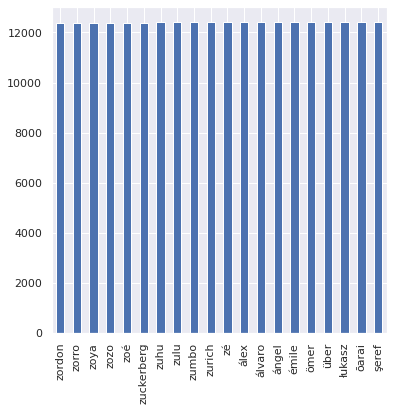

In [141]:
# lists to store the vocab and counts
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)

vocab_after_stem = pd.Series(count, index=vocab)
vocab_after_stem = vocab_after_stem.sort_values()
top_vacab = vocab_after_stem.tail(20)
top_vacab.plot(kind = 'bar', figsize=(6,6),xlim= (19000,19600))

In [143]:
df2['description'] = df2['description'].apply(lambda x:nltk.word_tokenize(x))

df2['description'] =df2['description'].apply(lambda x:[word.lower() for word in x if word.isalpha()])
df2['description'] =df2['description'].apply(lambda x:" ".join(x))
print(df2['description'])

0       futur elit inhabit island paradis far crowd sl...
1       devast earthquak hit mexico citi trap survivor...
2       armi recruit found dead fellow soldier forc co...
3       postapocalypt world robot hide fear danger mac...
4       brilliant group student becom expert intent sw...
                              ...                        
7782    lebanon civil war depriv zozo famili left grie...
7783    scrappi poor boy worm way tycoon dysfunct fami...
7784    documentari south african rapper nasti c hit s...
7785    dessert wizard adriano zumbo look next willi w...
7786    documentari delv mystiqu behind trio explor en...
Name: description, Length: 7777, dtype: object


In [144]:

df['listed_in'] = df['listed_in'].apply(lambda x:[word.lower() for word in x.split() if word.lower() not in sw])
df['listed_in'] =df['listed_in'].apply(lambda x:" ".join(x))

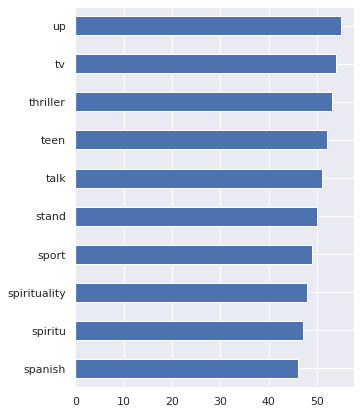

In [155]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
count_vectorizer.fit(df['listed_in'])
dictionary_l = count_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
for key, value in dictionary_l:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values()

top_vacab = vocab_bef_stem.tail(10)
top_vacab.plot(kind = 'barh', figsize=(5,7))

In [151]:
#stemming for listed_in

stemmer = SnowballStemmer("english")
df['listed_in'] = df['listed_in'].apply(lambda x:[stemmer.stem(word) for word in x.split()])
df['listed_in'] =df['listed_in'].apply(lambda x:" ".join(x))

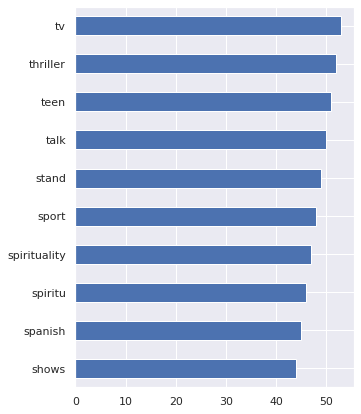

In [159]:
# object of tfid vectorizer
vectorizer = TfidfVectorizer(stop_words="english")
vectorizer.fit(df['listed_in'])
dictionary_listed_in = vectorizer.vocabulary_.items()

# vocab and counts
vocab = []
count = []
for key, value in dictionary_listed_in:
    vocab.append(key)
    count.append(value)

vocab_after_stem = pd.Series(count, index=vocab)
vocab_after_stem = vocab_after_stem.sort_values()
top_vacab = vocab_after_stem.tail(10)
top_vacab.plot(kind = 'barh', figsize=(5,7))

In [168]:

X_features_rec_mon=df[['length','length_listed']]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("n_clusters = {}, silhouette score is {}".format(n_clusters, score))
    

n_clusters = 2, silhouette score is 0.34651445349074333
n_clusters = 3, silhouette score is 0.356617398276977
n_clusters = 4, silhouette score is 0.32868103724161135
n_clusters = 5, silhouette score is 0.31018041568793187
n_clusters = 6, silhouette score is 0.32538295832480774
n_clusters = 7, silhouette score is 0.3213163994587618
n_clusters = 8, silhouette score is 0.32907173517774285
n_clusters = 9, silhouette score is 0.3272757950826091
n_clusters = 10, silhouette score is 0.33209335113384103
n_clusters = 11, silhouette score is 0.3379759515435536
n_clusters = 12, silhouette score is 0.33598107763507984
n_clusters = 13, silhouette score is 0.33601434868138336


n_clusters = 2 average silhouette_score : 0.34651445349074333
n_clusters = 3 average silhouette_score : 0.35601785496428634
n_clusters = 4 average silhouette_score : 0.3286146027042225
n_clusters = 5 average silhouette_score : 0.30947455147747543
n_clusters = 6 average silhouette_score : 0.32344712388842245
n_clusters = 7 average silhouette_score : 0.3226335179539019
n_clusters = 8 average silhouette_score : 0.32888970443429844
n_clusters = 9 average silhouette_score : 0.32176874926816396
n_clusters = 10 average silhouette_score : 0.33222299770367564
n_clusters = 11 average silhouette_score : 0.3366394994899641
n_clusters = 12 average silhouette_score : 0.33595355789186865
n_clusters = 13 average silhouette_score : 0.3292303807036428


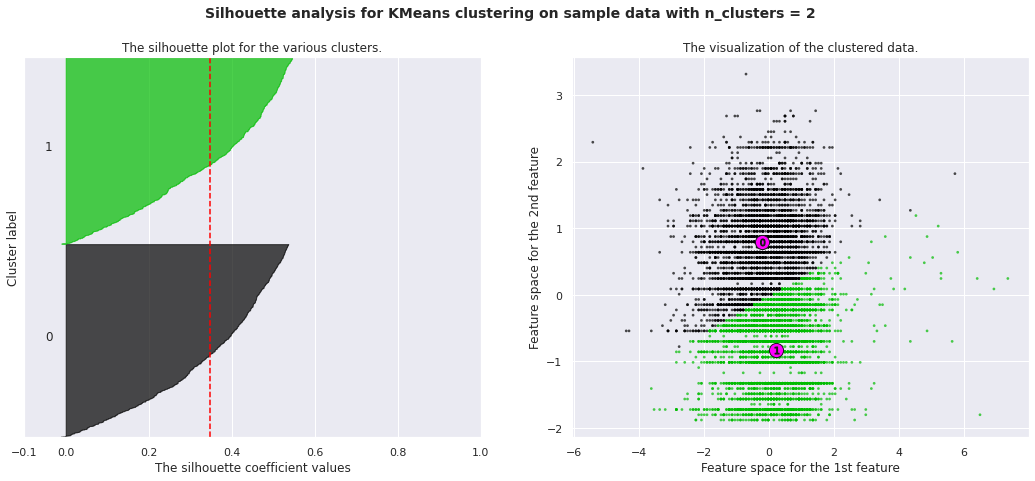

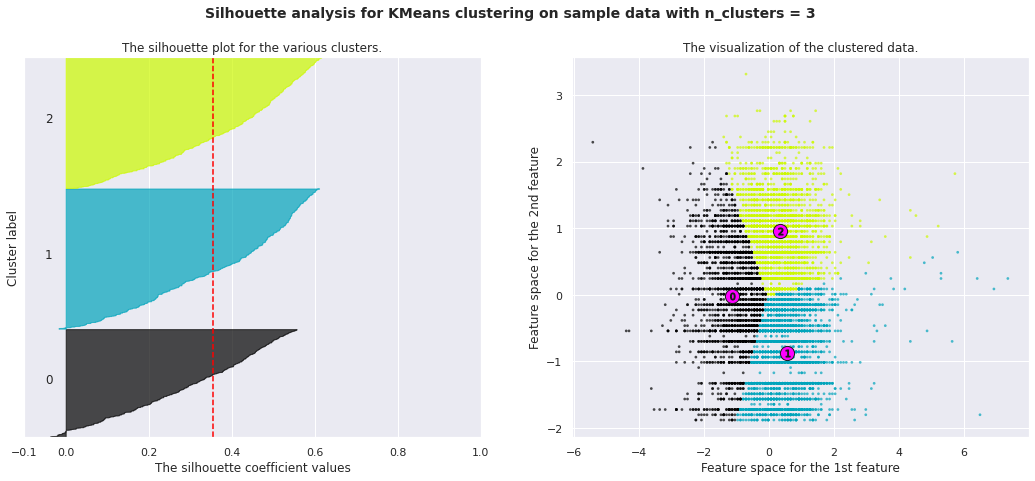

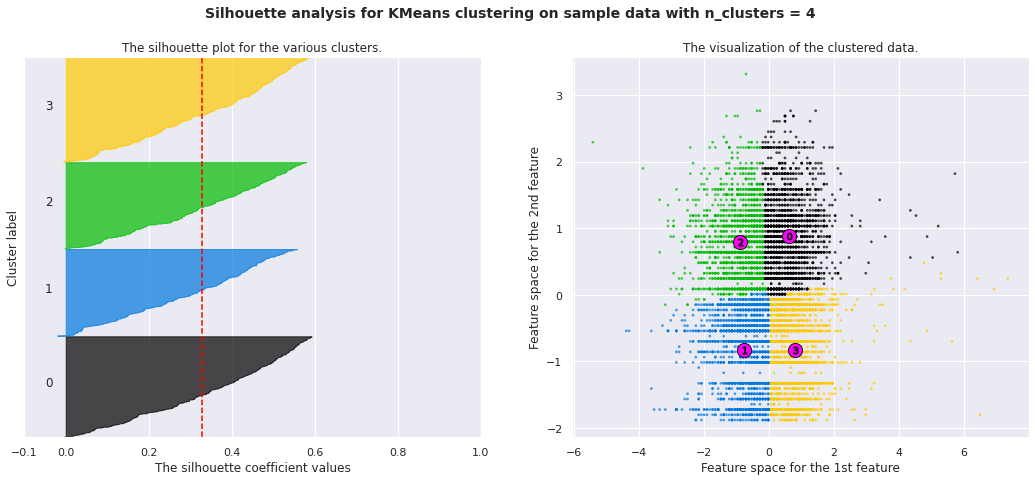

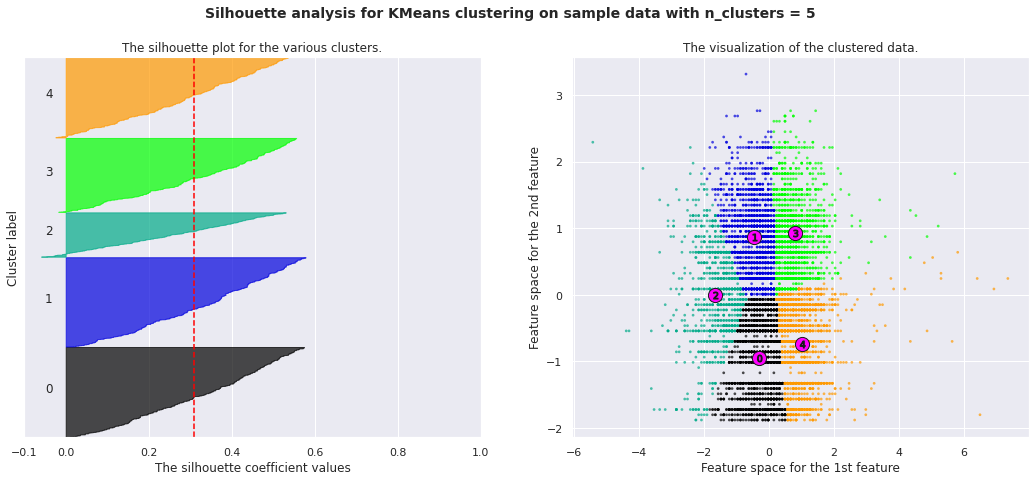

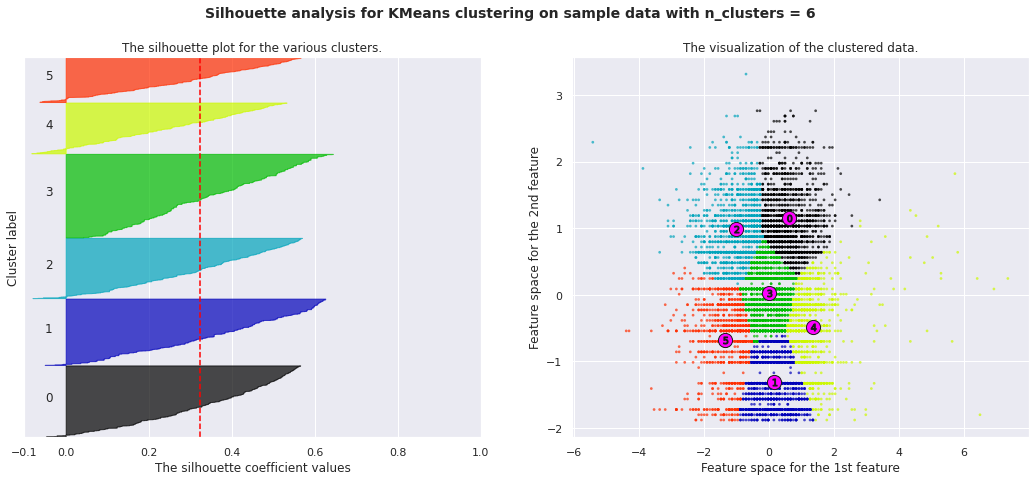

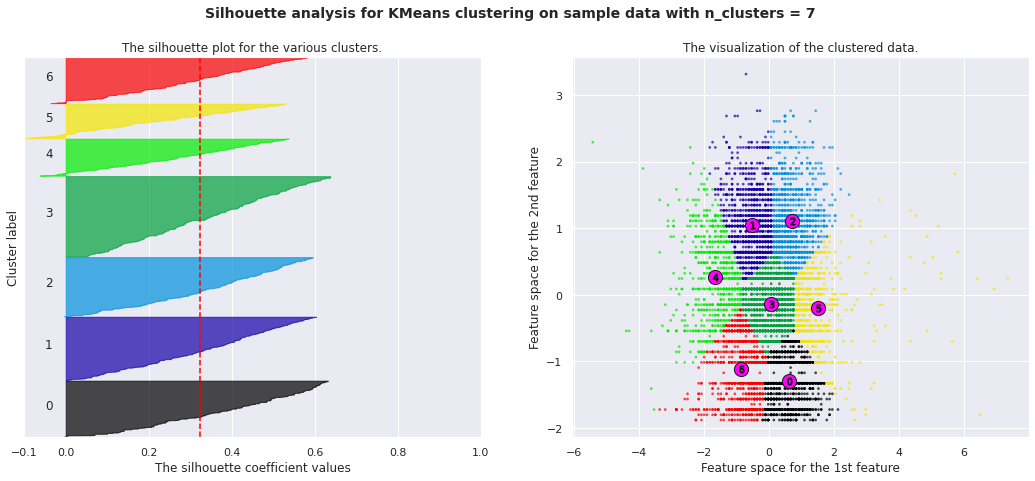

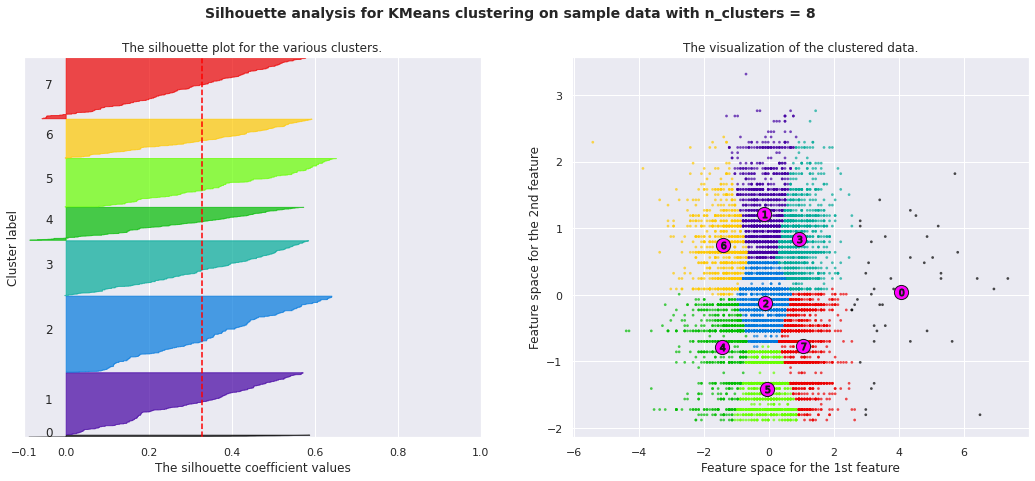

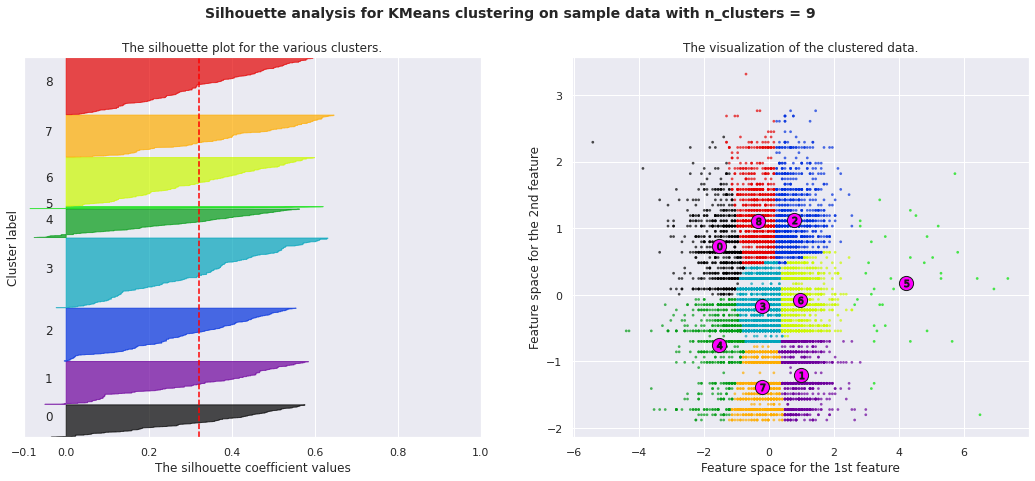

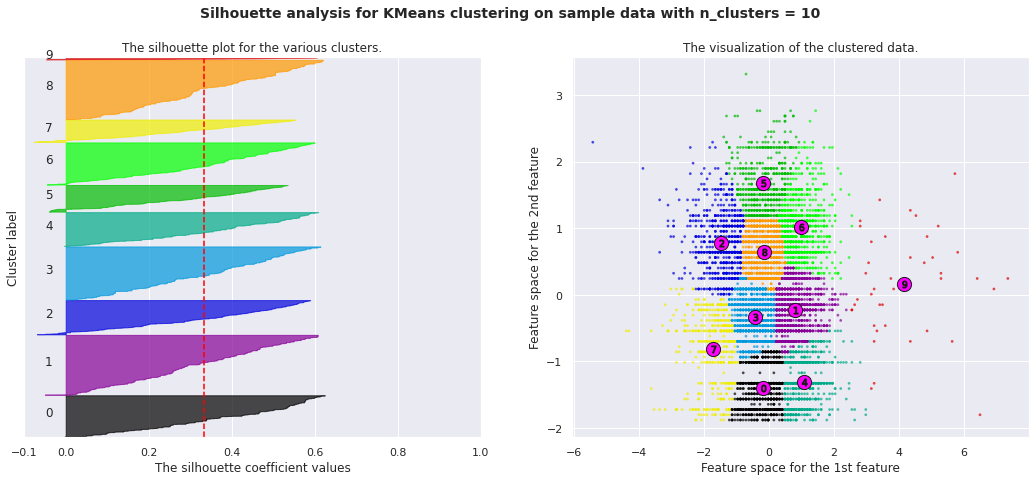

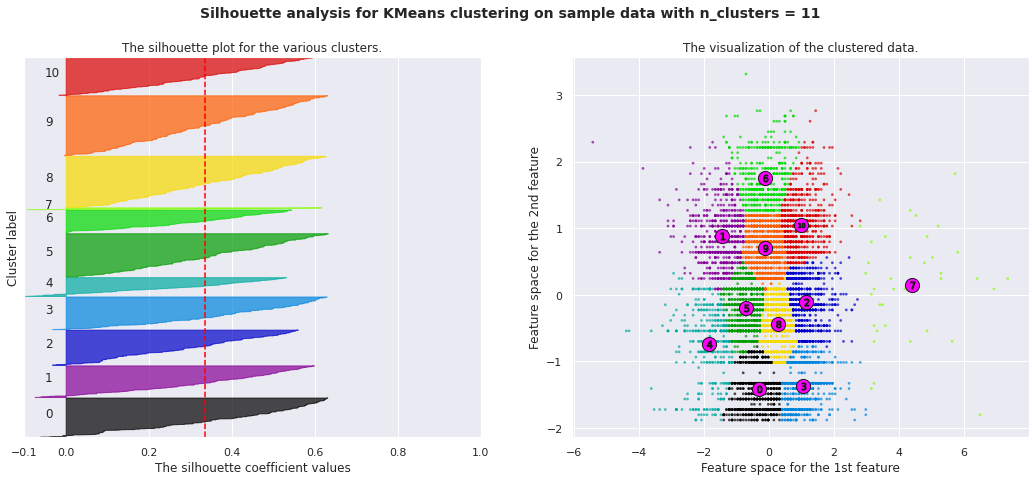

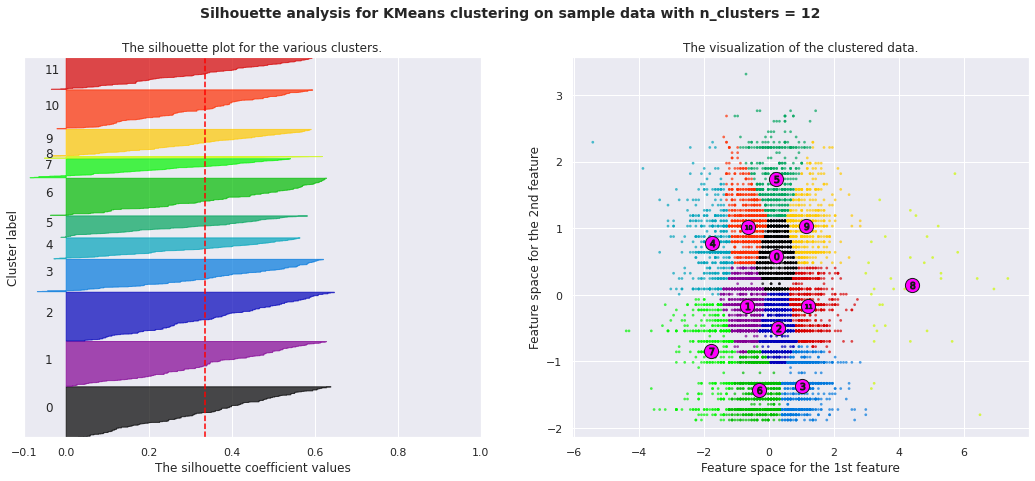

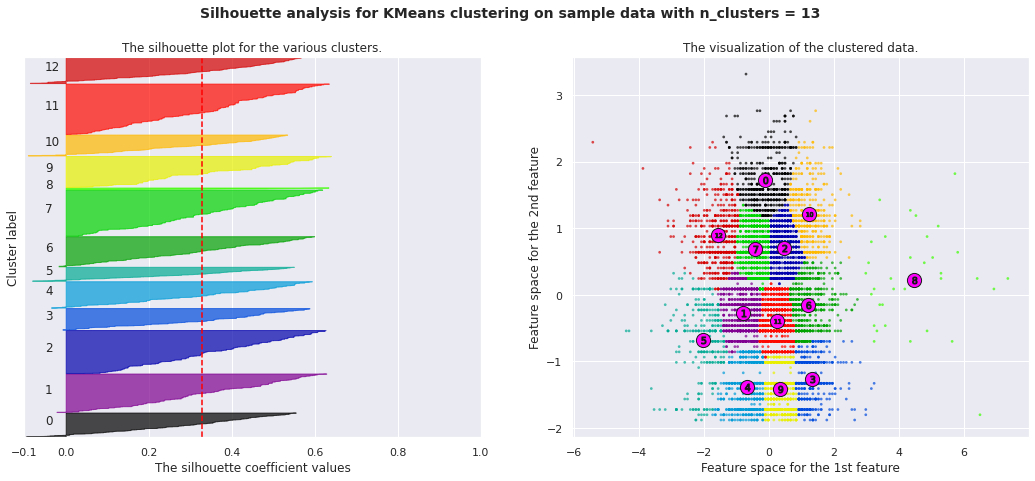

In [173]:


range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13]

for n_clusters in range_n_clusters:
    # Create a subplot 
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot 
    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("n_clusters =", n_clusters,
          "average silhouette_score :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores 
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling 
    centers = clusterer.cluster_centers_
    #  circles at cluster 
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="magenta", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

##Hierarchical Clustering

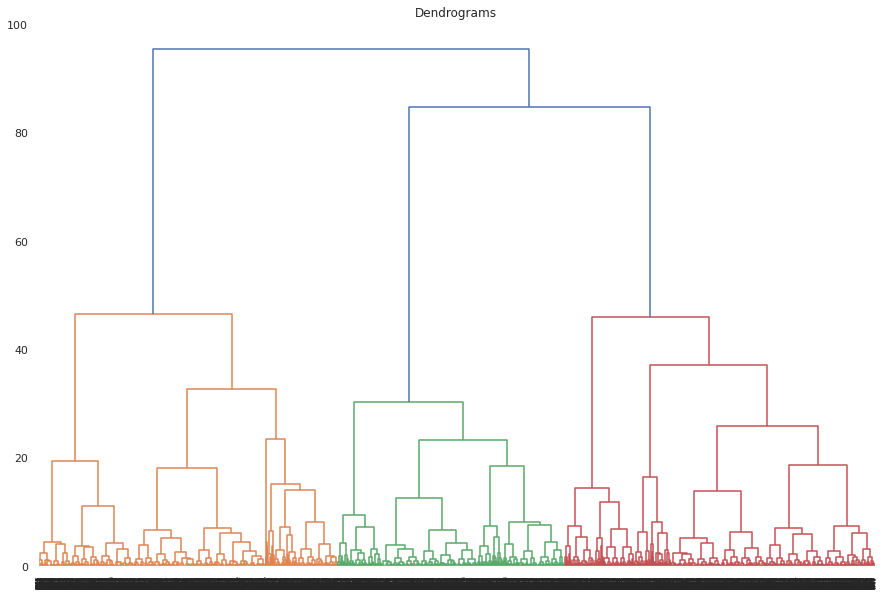

In [174]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15,10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.axhline(y=180)


No. of Cluster = 3

##DBSCAN

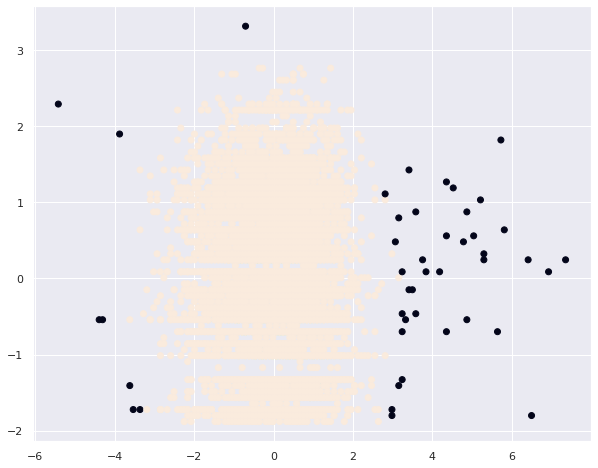

In [197]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.6, min_samples=15).fit_predict(X)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

##K-means Clustering

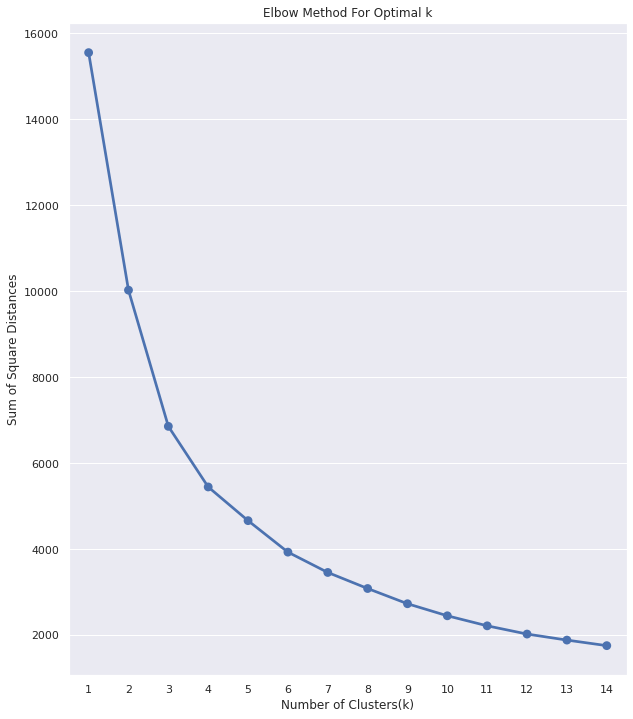

<Figure size 864x864 with 0 Axes>

In [175]:
# using elbow method to find the most suitable cluster numbers
features_for_clusterring =df[['length','length_listed']]
scaler_method =preprocessing.StandardScaler()
final_feature =scaler_method.fit_transform(features_for_clusterring) 
X=final_feature
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.figure(figsize=(12,12))
plt.show()

## K-means Clustering unsupervised ML algorithm

In [177]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

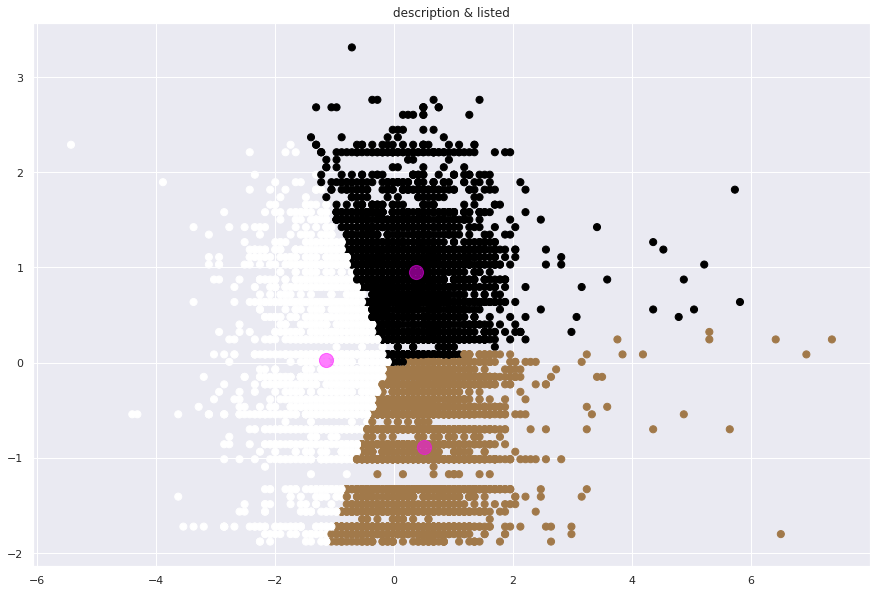

In [189]:
plt.figure(figsize=(15,10))
plt.title('description & listed')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='cubehelix')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='magenta', s=200, alpha=0.5)


*1-2992*

*2-2538*

*3-2240*

##Conclusion

The data set contains 7787 rows and 12 columns. The director features contain large number of missing values, so we can drop it. We have 10 features for the further implementation. The most popular directors on Netflix are Jan Suter and Anupam Kher. They have the most titles; mainly international as well. Sharukh Khan is the most popular actor among other actors on Netflix. By analysing the content added over years, we get to know that in recent years Netflix is focusing movies than TV shows (movies increased by 80% and TV shows increased by 73% compare to 2016 data). The most number of movies and TV shows release in 2017 and 2020 respectively; United Nation has maximum content on Netflix.


Netflix has increasingly focused on producing movies rather than TV shows since 2014. It has been producing more movies than TV shows in most countries since then. India lies at 2 position in popularity list; however it is still a very popular destination for streaming services such as Netflix, Amazon Prime Video and Hotstar. In most of the countries the content available on netflix is mostly of movie type except in South Korea and Japan, where variety is available. Cluster analysis was done using 'length', and 'length_listed' columns; with an average length of 209 seconds and length listed of 2,986 minutes, we obtained 3 clusters with silhoutte score 0.34 which is great indicating our clusters are homogeneous and are heterogeneous to one another.

#**Thankyou**